<a href="https://colab.research.google.com/github/raphaelassoun23/Projet-Python/blob/main/notebooks/MonteCarloCrypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#-----Installation des packages et importation des modules------
!pip install yfinance pandas

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

!git clone git@github.com:https://github.com/raphaelassoun23/Projet-Python.git

ModuleNotFoundError: No module named 'google.colab'

In [3]:
#-----Importation des données via API YahooFinance------

def get_data_yf(ticker, name):

    df = yf.download(ticker, period="max")
    df= df.reset_index()  # remettre la date comme colonne

    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

    # Renommer les colonnes pour avoir un dataset propre
    df = df.rename(columns={
        "Date": "timestamp",
        "Open": f"{name}_open",
        "High": f"{name}_high",
        "Low": f"{name}_low",
        "Close": f"{name}_price",
        "Volume": f"{name}_volume"
    })

    # On garde uniquement les colonnes utiles
    df = df[["timestamp",
             f"{name}_price",
             f"{name}_volume",
             f"{name}_open",
             f"{name}_high",
             f"{name}_low"]]

    return df

# Récupération BTC & ETH

btc_df = get_data_yf("BTC-USD", "BTC")
eth_df = get_data_yf("ETH-USD", "ETH")

# Récupération indices NASDAQ et SP500
sp500_df = get_data_yf("^GSPC", "SP500")
nasdaq_df = get_data_yf("^IXIC", "NASDAQ")

# Fusionner les deux cryptos et les indices dans un dataset sur la base temporelle commune

df = pd.merge(btc_df, eth_df, on='timestamp', how='inner')
df = df.merge(sp500_df, on="timestamp", how="inner")
df = df.merge(nasdaq_df, on="timestamp", how="inner")

#Taille du dataset
print(btc_df.shape)
print(eth_df.shape)
print(sp500_df.shape)
print(nasdaq_df.shape)
print(df.shape)
#Premiere et dernière date de chaque datset, bitcoin commence en 2014 et eth en 2017 > on reg a partir de 2017
print(btc_df['timestamp'].min(), btc_df['timestamp'].max())
print(eth_df['timestamp'].min(), eth_df['timestamp'].max())
print(sp500_df['timestamp'].min(), sp500_df['timestamp'].max())
print(nasdaq_df['timestamp'].min(), nasdaq_df['timestamp'].max())
print(df['timestamp'].min(), df['timestamp'].max())

#Afficher le dataset
print(df.head())


/tmp/ipykernel_1359/632157625.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1359/632157625.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1359/632157625.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1359/632157625.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="max")
[*********************100%***********************]  1 of 1 completed

(4106, 6)
(2957, 6)
(24605, 6)
(13831, 6)
(2034, 21)
2014-09-17 00:00:00 2025-12-13 00:00:00
2017-11-09 00:00:00 2025-12-13 00:00:00
1927-12-30 00:00:00 2025-12-12 00:00:00
1971-02-05 00:00:00 2025-12-12 00:00:00
2017-11-09 00:00:00 2025-12-12 00:00:00
   timestamp    BTC_price  BTC_volume     BTC_open     BTC_high      BTC_low  \
0 2017-11-09  7143.580078  3226249984  7446.830078  7446.830078  7101.520020   
1 2017-11-10  6618.140137  5208249856  7173.729980  7312.000000  6436.870117   
2 2017-11-13  6559.490234  6263249920  5938.250000  6811.189941  5844.290039   
3 2017-11-14  6635.750000  3197110016  6561.479980  6764.979980  6461.750000   
4 2017-11-15  7315.540039  4200880128  6634.759766  7342.250000  6634.759766   

    ETH_price  ETH_volume    ETH_open    ETH_high  ...  SP500_price  \
0  320.884003   893249984  308.644989  329.451996  ...  2584.620117   
1  299.252991   885985984  320.670990  324.717987  ...  2582.300049   
2  316.716003  1041889984  307.024994  328.415009  ..

In [4]:
#------Nettoyage des données------


# Vérification et suppression des doublons
print("Doublons avant nettoyage :", df.duplicated(subset='timestamp').sum())
df = df.drop_duplicates(subset='timestamp')

# Vérification des valeurs manquantes
print("Valeurs manquantes avant interpolation :\n", df.isna().sum())

# Choix de l'interpolation linéaire pour prix et volume (et OHLC) (ici pas vrmt besoin car 0 valeurs manquantes)
cols_to_interpolate = [
    'BTC_price', 'BTC_volume', 'BTC_open', 'BTC_high', 'BTC_low',
    'ETH_price', 'ETH_volume', 'ETH_open', 'ETH_high', 'ETH_low'
]
df[cols_to_interpolate] = df[cols_to_interpolate].interpolate(method='linear')

# Conversion du timestamp en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérification finale
print("Valeurs manquantes après interpolation :\n", df.isna().sum())
print(df.info())
print(df.head())

Doublons avant nettoyage : 0
Valeurs manquantes avant interpolation :
 timestamp        0
BTC_price        0
BTC_volume       0
BTC_open         0
BTC_high         0
BTC_low          0
ETH_price        0
ETH_volume       0
ETH_open         0
ETH_high         0
ETH_low          0
SP500_price      0
SP500_volume     0
SP500_open       0
SP500_high       0
SP500_low        0
NASDAQ_price     0
NASDAQ_volume    0
NASDAQ_open      0
NASDAQ_high      0
NASDAQ_low       0
dtype: int64
Valeurs manquantes après interpolation :
 timestamp        0
BTC_price        0
BTC_volume       0
BTC_open         0
BTC_high         0
BTC_low          0
ETH_price        0
ETH_volume       0
ETH_open         0
ETH_high         0
ETH_low          0
SP500_price      0
SP500_volume     0
SP500_open       0
SP500_high       0
SP500_low        0
NASDAQ_price     0
NASDAQ_volume    0
NASDAQ_open      0
NASDAQ_high      0
NASDAQ_low       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries,

In [5]:
#-----Création de nouvelles varaibles pour enrichir notre dataset et répondre à la problématique-----


for col in ['BTC', 'ETH', 'SP500', 'NASDAQ']:
  df[f'{col}_return_daily'] = np.log(df[f'{col}_price'] / df[f'{col}_price'].shift(1))

  if col in ['BTC','ETH']:

    # Volatilité rolling 7 jours
    df[f'{col}_volatility_7d'] = df[f'{col}_return_daily'].rolling(window=7).std()

    # Volatilité rolling 30 jours
    df[f'{col}_volatility_30d'] = df[f'{col}_return_daily'].rolling(window=30).std()

    # Moyenne mobile 7 jours
    df[f'{col}_moving_avg_7d'] = df[f'{col}_price'].rolling(window=7).mean()

    # Moyenne mobile 30 jours
    df[f'{col}_moving_avg_30d'] = df[f'{col}_price'].rolling(window=30).mean()

    # Range journalier (High - Low)
    df[f'{col}_range_daily'] = df[f'{col}_high'] - df[f'{col}_low']

    # Variation journalière du volume
    df[f'{col}_volume_change'] = df[f'{col}_volume'].pct_change()


# Vérification des valeurs manquantes
print("Valeurs manquantes sur df:\n", df.isna().sum())

# Gérer tous les NaN du nouveau dataset
df_final = df.dropna().reset_index(drop=True)

# Vérification rapide des infos du dataset
print("Valeurs manquantes sur df_final :\n", df_final.isna().sum())
print(df_final.info())
df_final

Valeurs manquantes sur df:
 timestamp               0
BTC_price               0
BTC_volume              0
BTC_open                0
BTC_high                0
BTC_low                 0
ETH_price               0
ETH_volume              0
ETH_open                0
ETH_high                0
ETH_low                 0
SP500_price             0
SP500_volume            0
SP500_open              0
SP500_high              0
SP500_low               0
NASDAQ_price            0
NASDAQ_volume           0
NASDAQ_open             0
NASDAQ_high             0
NASDAQ_low              0
BTC_return_daily        1
BTC_volatility_7d       7
BTC_volatility_30d     30
BTC_moving_avg_7d       6
BTC_moving_avg_30d     29
BTC_range_daily         0
BTC_volume_change       1
ETH_return_daily        1
ETH_volatility_7d       7
ETH_volatility_30d     30
ETH_moving_avg_7d       6
ETH_moving_avg_30d     29
ETH_range_daily         0
ETH_volume_change       1
SP500_return_daily      1
NASDAQ_return_daily     1
dtype: int

,timestamp,BTC_price,BTC_volume,BTC_open,BTC_high,BTC_low,ETH_price,ETH_volume,ETH_open,ETH_high,...,BTC_volume_change,ETH_return_daily,ETH_volatility_7d,ETH_volatility_30d,ETH_moving_avg_7d,ETH_moving_avg_30d,ETH_range_daily,ETH_volume_change,SP500_return_daily,NASDAQ_return_daily
0,2017-12-22,13831.799805,22197999616,15898.000000,15943.400391,11833.000000,674.859985,4977710080,822.643005,827.682983,...,0.343981,-0.196095,0.102098,0.086628,759.534424,508.866338,283.920959,0.394684,-0.000458,-0.000776
1,2017-12-26,16099.799805,13454300160,14036.599609,16461.199219,14028.900391,773.835999,2201159936,763.369995,786.789978,...,-0.393896,0.136855,0.115322,0.087064,770.680141,524.685772,25.854980,-0.557797,-0.001059,-0.003412
2,2017-12-27,15838.500000,12487600128,16163.500000,16930.900391,15114.299805,762.841980,2100029952,774.969971,789.252991,...,-0.071851,-0.014309,0.115226,0.087325,781.879281,539.556638,50.839966,-0.045944,0.000791,0.000445
3,2017-12-28,14606.500000,12336499712,15864.099609,15888.400391,13937.299805,737.023010,2389149952,762.208008,763.318970,...,-0.012100,-0.034432,0.099526,0.087824,773.647566,552.869704,62.131958,0.137674,0.001832,0.001558
4,2017-12-29,14656.200195,13025500160,14695.799805,15279.000000,14307.000000,753.591980,2648969984,740.388977,770.117004,...,0.055851,0.022232,0.098262,0.087524,763.185992,566.877537,40.509033,0.108750,-0.005197,-0.006752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,2025-12-08,90640.203125,57394099056,90424.585938,92267.117188,89644.890625,3125.197998,25262165670,3061.013672,3177.867676,...,-0.092675,0.032774,0.053929,0.044372,3043.707450,3282.355469,134.163818,-0.097788,-0.003483,-0.001368
2000,2025-12-09,92691.710938,66861721440,90639.703125,94601.570312,89586.976562,3321.114990,32012553374,3124.942627,3395.838623,...,0.164958,0.060803,0.057887,0.045063,3084.966099,3255.721899,302.962158,0.267213,-0.000877,0.001298
2001,2025-12-10,92020.945312,65420694513,92695.234375,94477.156250,91640.132812,3325.390137,30694387989,3321.204102,3446.622803,...,-0.021552,0.001286,0.042282,0.044798,3159.994838,3233.826156,156.475830,-0.041177,0.006727,0.003289
2002,2025-12-11,92511.335938,64532834621,92011.304688,93554.265625,89335.296875,3237.056885,29066243707,3324.386719,3327.344482,...,-0.013572,-0.026922,0.041180,0.044890,3194.154436,3211.616284,178.310059,-0.053044,0.002077,-0.002552


Les valeurs manquantes présentes dans le dataset proviennent uniquement des transformations réalisées (retours, volatilités, moyennes mobiles). Ces NaN correspondent aux premières observations où les fenêtres de calcul ne sont pas encore complètes.
Ils ne représentent donc pas de véritables trous dans les données.
Leur suppression est justifiée, car elle ne retire qu’un très faible nombre d’observations et évite d’introduire un biais par une imputation artificielle
(par la moyenne,par la médiane ou par régression)

In [6]:
corr_matrix = df_final[['BTC_return_daily','SP500_return_daily','NASDAQ_return_daily']].corr()
print(corr_matrix)

corr_matrix = df_final[['ETH_return_daily','SP500_return_daily','NASDAQ_return_daily']].corr()
print(corr_matrix)

corr_matrix = df_final[['ETH_return_daily','BTC_return_daily']].corr()
print(corr_matrix)


                     BTC_return_daily  SP500_return_daily  NASDAQ_return_daily
BTC_return_daily             1.000000            0.294880             0.311414
SP500_return_daily           0.294880            1.000000             0.950965
NASDAQ_return_daily          0.311414            0.950965             1.000000
                     ETH_return_daily  SP500_return_daily  NASDAQ_return_daily
ETH_return_daily             1.000000            0.321672             0.335859
SP500_return_daily           0.321672            1.000000             0.950965
NASDAQ_return_daily          0.335859            0.950965             1.000000
                  ETH_return_daily  BTC_return_daily
ETH_return_daily          1.000000          0.812422
BTC_return_daily          0.812422          1.000000


Les premières observations sur les rendements journaliers montrent que le Bitcoin présente une corrélation faible à modérée avec le S&P 500 (≈0,29) et le NASDAQ (≈0,31). En comparaison, le S&P 500 et le NASDAQ sont fortement corrélés entre eux (≈0,95), comme attendu.
Ces résultats suggèrent qu’au niveau global, le Bitcoin ne suit pas étroitement les marchés financiers traditionnels et pourrait évoluer de manière relativement indépendante. Il s’agit pour l’instant d’une analyse exploratoire, qui devra être complétée par une étude dynamique dans le temps et des tests plus approfondis pour confirmer ces tendances.

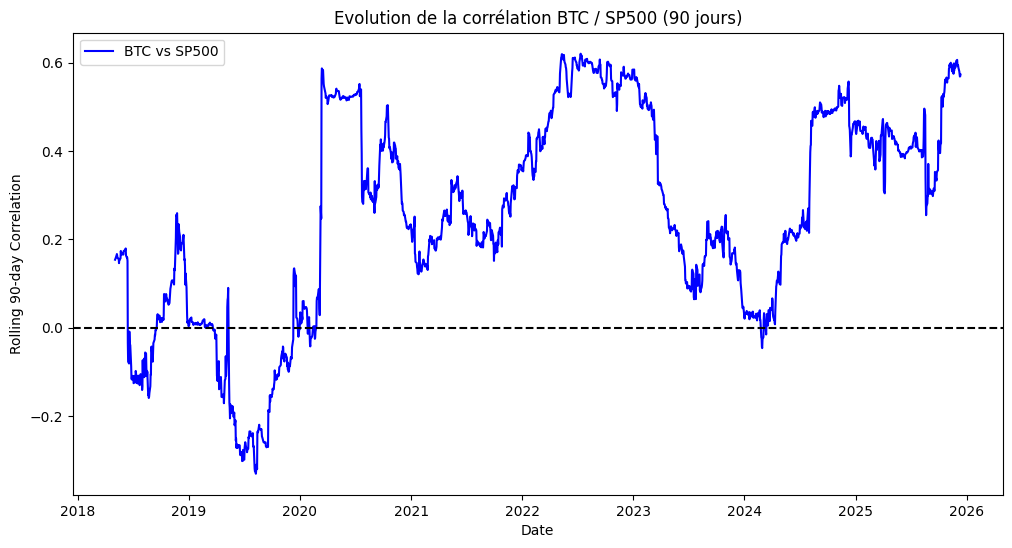

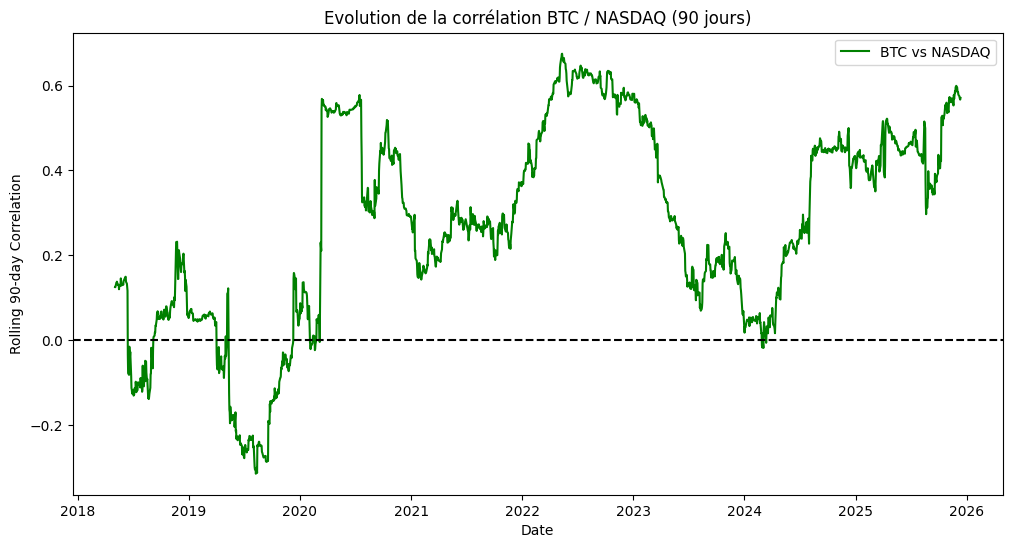

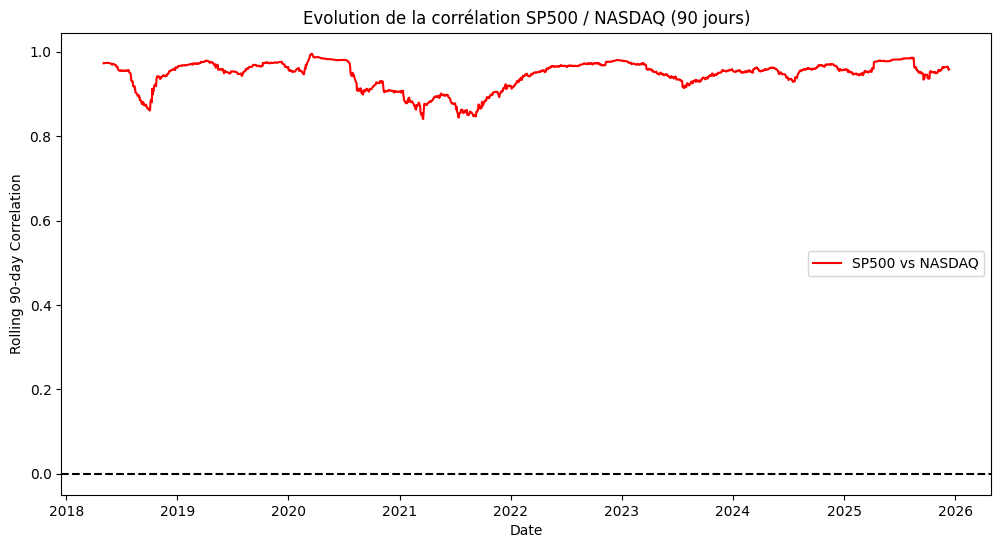

In [7]:
rolling_corr_SP500 = df_final['BTC_return_daily'].rolling(window=90).corr(df_final['SP500_return_daily'])
rolling_corr_NASDAQ = df_final['BTC_return_daily'].rolling(window=90).corr(df_final['NASDAQ_return_daily'])
rolling_corr_SP500_et_NASDAQ = df_final['SP500_return_daily'].rolling(window=90).corr(df_final['NASDAQ_return_daily'])

# Graphique BTC vs SP500
plt.figure(figsize=(12,6))
plt.plot(df_final['timestamp'], rolling_corr_SP500, label='BTC vs SP500', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rolling 90-day Correlation')
plt.title('Evolution de la corrélation BTC / SP500 (90 jours)')
plt.legend()
plt.show()

# Graphique BTC vs NASDAQ
plt.figure(figsize=(12,6))
plt.plot(df_final['timestamp'], rolling_corr_NASDAQ, label='BTC vs NASDAQ', color='green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rolling 90-day Correlation')
plt.title('Evolution de la corrélation BTC / NASDAQ (90 jours)')
plt.legend()
plt.show()

# Graphique SP500 vs NASDAQ
plt.figure(figsize=(12,6))
plt.plot(df_final['timestamp'], rolling_corr_SP500_et_NASDAQ, label='SP500 vs NASDAQ', color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Rolling 90-day Correlation')
plt.title('Evolution de la corrélation SP500 / NASDAQ (90 jours)')
plt.legend()
plt.show()

Le graphique met en évidence une corrélation très instable dans le temps entre Bitcoin et les indices boursiers traditionnels (Nasdaq et S&P 500). Contrairement aux actifs financiers classiques, dont la corrélation reste généralement plus stable, Bitcoin présente une structure de dépendance très volatile : certaines périodes montrent une corrélation nettement positive, tandis que d’autres phases se caractérisent par une décorrélation quasi totale.
Cette dynamique confirme que Bitcoin ne réagit pas systématiquement aux mêmes facteurs macroéconomiques que les actions. Les phases de corrélation élevée semblent principalement associées à des épisodes de tension macro ou financière, où les actifs risqués évoluent de manière plus synchronisée. À l’inverse, lorsque les conditions se normalisent, Bitcoin retrouve un comportement plus autonome.
Ces résultats suggèrent que Bitcoin ne pourrait pas être considéré comme un actif structurellement aligné avec les marchés actions : son potentiel de diversification dépend fortement de la période étudiée.

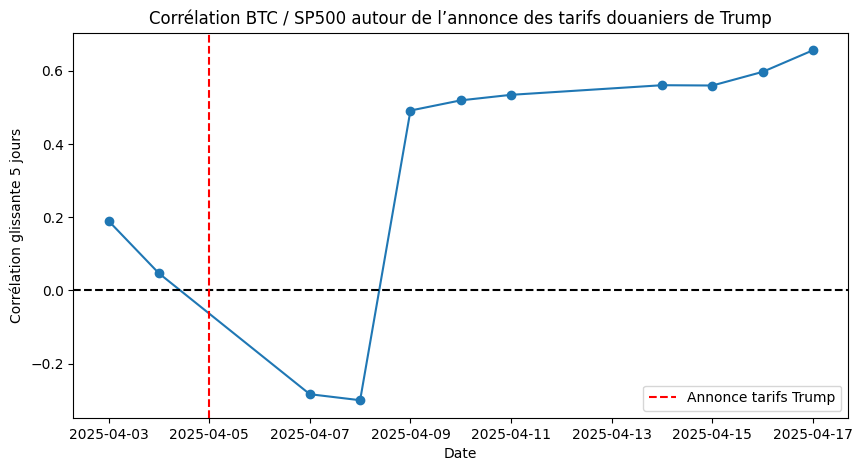

In [8]:
# Date de l'événement
event_date = pd.to_datetime('2025-04-05')

# Définir une fenêtre autour de l'événement, par ex. ±15 jours
window = 15
start_date = event_date - pd.Timedelta(days=window)
end_date = event_date + pd.Timedelta(days=window)

# Filtrer le dataset pour cette période
event_df = df_final[(df_final['timestamp'] >= start_date) & (df_final['timestamp'] <= end_date)]

# Calculer la corrélation glissante sur 5 jours autour de l'événement
rolling_corr_event = event_df['BTC_return_daily'].rolling(window=10).corr(event_df['SP500_return_daily'])

# Visualiser
plt.figure(figsize=(10,5))
plt.plot(event_df['timestamp'], rolling_corr_event, marker='o', linestyle='-')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(event_date, color='red', linestyle='--', label='Annonce tarifs Trump')
plt.xlabel('Date')
plt.ylabel('Corrélation glissante 5 jours')
plt.title('Corrélation BTC / SP500 autour de l’annonce des tarifs douaniers de Trump')
plt.legend()
plt.show()

Pendant l’annonce des tarifs douaniers, la corrélation BTC / SP500 augmente, car un choc macroéconomique majeur fait réagir simultanément les investisseurs sur plusieurs actifs. Cette corrélation élevée est temporaire, et Bitcoin reprend ensuite son comportement relativement indépendant comme on a pu le voir avec les graphes précédents.

In [50]:
# Récupération des données à partir des fichiers .csv

aluminium = pd.read_csv("../data/Aluminium Historical Data.csv")
brent_oil = pd.read_csv("../data/Brent Oil Futures Historical Data.csv")
copper = pd.read_csv("../data/Copper Futures Historical Data.csv")
crude_oil = pd.read_csv("../data/Crude Oil WTI Futures Historical Data.csv")
gas = pd.read_csv("../data/Natural Gas Futures Historical Data.csv")
gasoline = pd.read_csv("../data/Gasoline RBOB Futures Historical Data.csv")
gold = pd.read_csv("../data/Gold Futures Historical Data.csv")
london_wheat = pd.read_csv("../data/London Wheat Futures Historical Data.csv")
silver = pd.read_csv("../data/Silver Futures Historical Data.csv")
us_corn = pd.read_csv("../data/US Corn Futures Historical Data.csv")
us_soybeans = pd.read_csv("../data/US Soybeans Futures Historical Data.csv")
us_wheat = pd.read_csv("../data/US Wheat Futures Historical Data.csv")

In [51]:
us_wheat.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/12/2025,529.25,534.75,536.00,529.00,48.69K,-0.80%
1,12/11/2025,533.50,529.75,534.75,529.25,67.35K,0.76%
2,12/10/2025,529.50,534.00,535.00,525.25,68.63K,-0.94%
3,12/09/2025,534.50,535.50,537.75,531.25,54.30K,-0.05%
4,12/08/2025,534.75,535.25,540.00,532.50,49.77K,-0.19%


In [52]:
us_wheat

,Date,Price,Open,High,Low,Vol.,Change %
0,12/12/2025,529.25,534.75,536.00,529.00,48.69K,-0.80%
1,12/11/2025,533.50,529.75,534.75,529.25,67.35K,0.76%
2,12/10/2025,529.50,534.00,535.00,525.25,68.63K,-0.94%
3,12/09/2025,534.50,535.50,537.75,531.25,54.30K,-0.05%
4,12/08/2025,534.75,535.25,540.00,532.50,49.77K,-0.19%
...,...,...,...,...,...,...,...
2287,01/09/2017,427.25,424.75,428.25,421.00,69.62K,0.95%
2288,01/06/2017,423.25,425.75,428.00,421.75,64.73K,-0.70%
2289,01/05/2017,426.25,418.75,427.00,416.25,86.77K,1.85%
2290,01/04/2017,418.50,406.50,419.00,404.75,59.20K,2.95%


In [69]:
# Organisant les dates

names = [aluminium, brent_oil, gas, gasoline, gold, london_wheat, silver, us_corn, us_soybeans, us_wheat]

for i in range(len(names)):
    names[i]["Date"] = pd.to_datetime(names[i]["Date"], format="%m/%d/%Y")
    names[i] = names[i].sort_values("Date", ascending=True).reset_index(drop=True)

# Ne pas modifier

(aluminium, brent_oil, gas, gasoline, gold, london_wheat, silver, us_corn, us_soybeans, us_wheat) = names

In [70]:
us_wheat

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-01-03,406.50,408.75,414.00,405.75,65.59K,-0.37%
1,2017-01-04,418.50,406.50,419.00,404.75,59.20K,2.95%
2,2017-01-05,426.25,418.75,427.00,416.25,86.77K,1.85%
3,2017-01-06,423.25,425.75,428.00,421.75,64.73K,-0.70%
4,2017-01-09,427.25,424.75,428.25,421.00,69.62K,0.95%
...,...,...,...,...,...,...,...
2287,2025-12-08,534.75,535.25,540.00,532.50,49.77K,-0.19%
2288,2025-12-09,534.50,535.50,537.75,531.25,54.30K,-0.05%
2289,2025-12-10,529.50,534.00,535.00,525.25,68.63K,-0.94%
2290,2025-12-11,533.50,529.75,534.75,529.25,67.35K,0.76%


In [22]:
# Nettoyage des données